In [31]:
%run ../button.ipynb

<IPython.core.display.Javascript object>

<a id="top"></a>
<center><h1>Case study for various datatset</h1></center>
--------

The following datasets have different characteristics and can be interpreted and visualised by different kinds of dimensionality reduction methods. Such case studies on different data will help us to have better understanding of the characteristic and properties of methods.
1. [ Handwritten digits](#digits)
- [ Concentric circles](#concentric circle)
- [ Down Syndrome mice](#mice)
- [ Eigenfaces](#eigenfaces)
- [ S-Shape Manifold](#manifold)
- [TfL Categorical dataset](#tfl)

[[back to outline](../Tutorial notebook.ipynb#top)]

In [32]:
%run functions.ipynb #load related function needed for this sheet

<a id='digits'></a>

# 1. Handwritten digits

[[back to top](#top)]

## Introduction
Each handwritten digit can be transformed into a matrix with entries corresponding to the grey scale of that pixel.
<img src="digit1.png" alt="Drawing" style="width: 800px;"/>

## My sample data

- Load handwritten digits from *sklearn.datasets*, with 5 classes: ZERO, ONE, TWO, THREE, FOUR.

In [33]:
print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=5)
X_digits = digits.data
y_digits = digits.target
n_samples, n_features = X_digits.shape
n_neighbors = 30
label_digits = ['ZERO','ONE','TWO','THREE','FOUR']

Automatically created module for IPython interactive environment


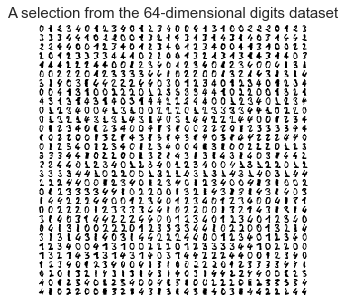

In [34]:

# Plot images of the digits
n_img_per_row = 30  #!!!can change the img per row to say 30, as 30*30 = 900 < 1083
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X_digits[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset',fontsize=15)###########
plt.show()

Each handwritten digit has $8 \times 8$ pixels, so each entry can be expressed numerically according the grey scale, so that each handwritten digit can expressed as a 8 by 8 matrix, and finally stretch it into a 64 dimensional vector, being a row in our input matrix.

In [35]:
import seaborn as sns
d2 = pd.DataFrame(digits.images[10])
cm = sns.light_palette("green", as_cmap=True)
s2 = d2.style.background_gradient(cmap=cm)

s2


,0,1,2,3,4,5,6,7
0,0,0,3,13,11,7,0,0
1,0,0,11,16,16,16,2,0
2,0,4,16,9,1,14,2,0
3,0,4,16,0,0,16,2,0
4,0,0,16,1,0,12,8,0
5,0,0,15,9,0,13,6,0
6,0,0,9,14,9,14,1,0
7,0,0,2,12,13,4,0,0


In [36]:
#One specific row in input dataset, it is formed by stretchness of pixel matrix
dd2 = pd.DataFrame(digits.data[10])
d = dd2.T
s = dd2.style.background_gradient(cmap=cm)


## Characteristic 
> Each row of input matrix represents one handwritten digit, since all covariates have the same scale, so there is no need to rescale or preprocess the dataset.

> Possible senario: There exist $i$ and $j$, such that $var(x_i) = var(x_j)$, but label($x_i$) $\neq$ label($x_j$).

<a id='concentric circle'></a>

# 2. Concentric circles

[[back to top](#top)]

This dataset consists of two classes of three dimensional data points, blue and red. Generally, observed that the way of classification might depend on the distance between data point to the origin.

<img src="circle.png" alt="Drawing" style="width: 300px;"/>

%%Put the code on if more time!!

After applying on the methods of principal component analysis: [Linear PCA](../definition/definition.ipynb#pca), [Kernel PCA](../definition/definition.ipynb#kernel pca), the dimension of data is reduced from three to two dimensional projected space, it gives us different visualisation.

Standard (Linear) PCA behaves worst and Gaussian Kernel PCA have the perfect visualisation of classes, as it can be classified by a linear line.

<img src="circle_pca.png" alt="Drawing" style="height: 250px;"/>

## Characteristic 
> Two classes are classified by the Euclidean distance from points to origin, blue and red group represents data points with longer and shorter distance respectively. Under such setting, the dataset is linearly inseparable, so it is not suitable to implement PCA.

aaaaa cite paper

<a id='mice'></a>

# 3. Down Syndrome mice

[[back to top](#top)]

In 2015, a experimental reserach done by Higuera, Gardiner and Cios shows that there are relations between experimental subjects and experimental outcomes. According to the experiments done on down syndrome mice, they want to see whether there are any improvement of mice's learning capability. In the experiment, given shock stimulation on both normal/control and down syndrome/control mice, mice are given treatments with either memantine and saline/water, so mice could be classified into 4 classes.

Their research made the conclusion that normal-water mice and normal-memantine mice resulted in *Normal learning outcome*, while sick-water and sick memantine mice will results in *failed and rescued learning outcome* respectively. However, here we would like to utilise such research result and try to verify it from the perspective of protein data extracted from the brain of mice.

In [37]:
#![](mice graph.png)

<img src="mice graph.png" alt="Drawing" style="width: 500px;"/>

This data consists of 1080 mice, each of them is featured by the value of 77 type of proteins in the slices of mice brain. There are much effort made on such mice protein profile dataset, [Higuera (2015)](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0129126) has suggested that:

>Results suggest that the application of the unsupervised clustering method, self organizing maps (SOM), to new experimental data sets of complex protein profiles can be used to identify common critical protein responses, which in turn may aid in identifying potentially more effective drug targets.

## Preprocessing the data

There are some missing value in the dataset, so we need to find optimal way to delete such corresponding row or column, so that it can be a valid input matrix of dimensionality reduction method.

In [46]:
mydata = pd.read_csv('../dataset/Data_Cortex_Nuclear.csv')
protein = mydata.T[:82][2:].T
protein= protein[protein["Behavior"]=="C/S"]
CSSC = protein["Genotype"]=="Ts65Dn"
labelling = CSSC.astype('int')
labelling[protein['class']=='t-CS-m']=2
protein = protein.T[:76].T

mydata #The original dataframe

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503643884,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.51461708,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442106692,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940244,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506385,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428032684,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416922604,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386310905,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827447,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


Columns such as **DYRK1A_N** represents the value of a type of protein; column **MouseID** represents the ID for each experimental mice; the last few columns such as **Genotype** are the ground truth of classes of mice, which won't be involved in actual implementation of methods.

In order to tackle the problem of missing value, we create an algorithm:
> delete the columns of protein if more than $3$ observations have missing values for that protein.
>
> delete the row observation if more than $3$ proteins value is missing.

In such way, we can preserve the most amount of observations for later analysis.

- Load Function: 
> **[RefineData](functions.ipynb#RefineData)** (dataset with missing value, classes) = (refined data, refined labelling, deleted rows, deleted columns)


In [39]:
%run functions.ipynb

In [40]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
from sklearn import manifold
Axes3D
#data refinement
(X_mice, Y_mice,delrow, delcolumn) = RefineData(protein,labelling)


8 proteins covariates are deleted due to more than three missing value for that protein
[22, 26, 67, 68, 70, 72, 73, 74]
105 experiments are deleted due to more than three missing protein value for that experiment
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329]
Check no more missing value in our refined dataset: True
The resulting input data matrix is refined from 
525 by 76 
to 
420 by 68 dimension


## Characteristic 
> Each covariate (protein) takes numerical value but have different scale. 

> We label the dataset such that

   |Classes| Label   | Color | 
 | ------------- | ------------- | ------------- |
 |Normal Learning|  0| red   |
|  Failed Learning|   1 |yellow  |
| Rescured Learning | 2  | blue   |  


<a id='eigenfaces'></a>

# 4. Eigenfaces

[[back to top](#top)]

- Load face data from [*sklearn.dataset fetch_olivetti_faces*](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html).

In [41]:
import logging
from time import time
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 8,8
n_components = n_row*n_col
image_shape = (64, 64)
rng = RandomState(0)

#load face data


dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

- Centering the faces

In [42]:
# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


Dataset consists of 400 faces


- Load Funtion: 
    > [Plot_gallery](../casestudy/functions.ipynb#Plot_gallery) (title, images, no. of columns, no. of rows)

In [43]:
%run functions.ipynb

- Plot the original centered Olivetti faces

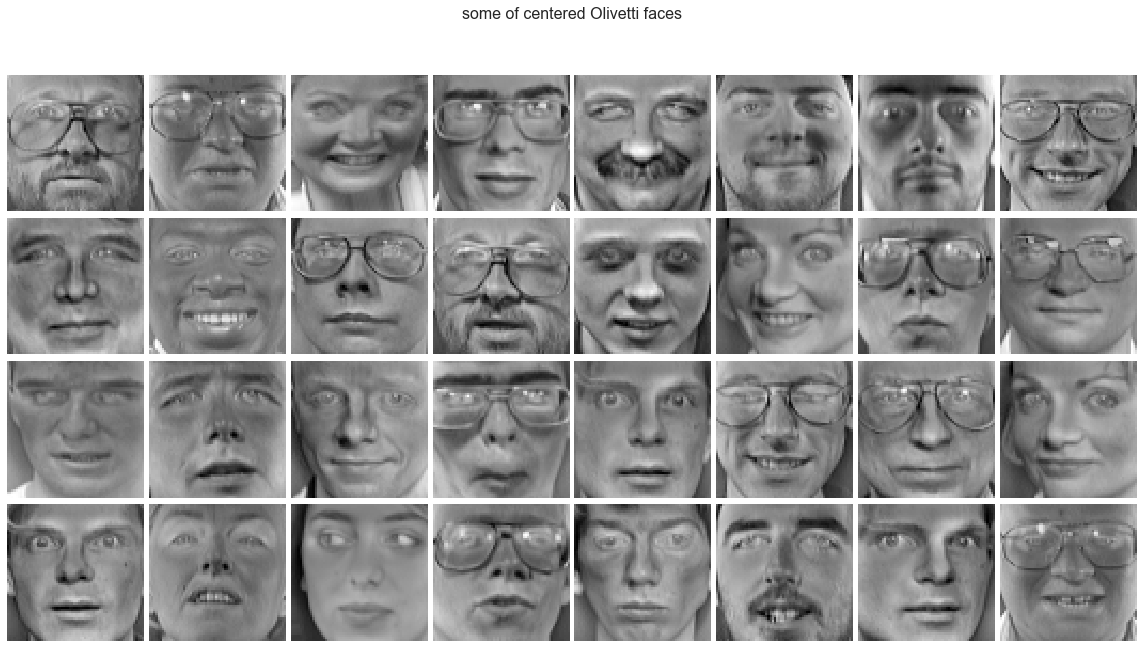

In [44]:
plot_gallery("some of centered Olivetti faces", faces_centered[:32],n_col,n_row)

<a id='manifold'></a>

# 5. S-shaped Manifolds

[[back to top](#top)]

## Introduction
> Intuitively speaking, a manifold is a set of coordinates, usually in high dimensional space, each of these is continuously connected with its neighbour piecewisely. Given the preservation of neighbourhood mapping, the manifold's dimension is determined by the smallest embedded space that no projected data points will be overlapped, in other words, the projection could be a one-to-one mapping. 

> One-dimensional manifolds include lines and circles, but not figure eights (because they have crossing points that are not locally homeomorphic to Euclidean 1-space). Two-dimensional manifolds are also called surfaces. Examples include the plane, the sphere, and the torus, which can all be embedded (formed without self-intersections) in three-dimensional real space, but also the Klein bottle and real projective plane, which will always self-intersect when immersed in three-dimensional real space. 

> <img src="lle0.png" alt="Drawing" style="width: 200px;"/>


> From the figure below, **(A)** is a two-dimensional nonlinear separable object called Swiss-Roll manifold. **(B)** is the set of data points sampled from **(A)**. LLE is able to discover the global internal coordinates of the manifold and underlying structure which is a two-dimensional panel, it is illustrated in **(C)** by colour coding; black outlines in **(B)** and **(C)** show the neighbourhood of a single point.

> <img src="lle1.png" alt="Drawing" style="width: 600px;"/>

## Dataset
> The following figure has 1000 points which are all sampled from a two dimensional manifold. Such dataset is sourced from *datasets.samples_generator.make_s_curve*.

> Our aim is to transform this manifold from three dimensional space into an embedding space, so that the neighborhood of every datapoint can be preserved.

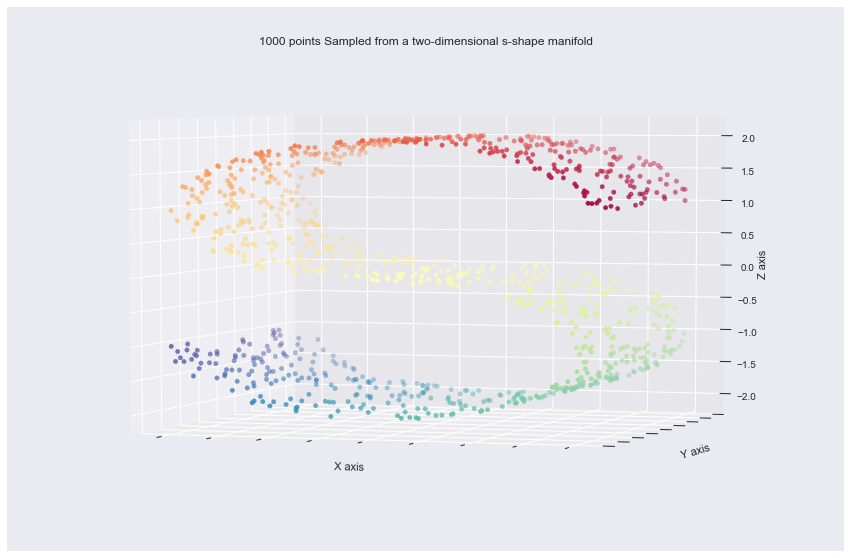

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X_manifold, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_manifold[:, 0], X_manifold[:, 1], X_manifold[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.title("%i points Sampled from a two-dimensional s-shape manifold" % (n_points))

plt.show()

## Characteristic
> One of the most important features of manifold data type is the relationship of the neighbours. The most common way is to optimize the Euclidean distance between two points, but it will be undesirable if some of two points are paired as a neighbour even the distance between them is short, such as red and green dots. In order to avoid such case happened, there are groups of methods called manifold learning which can be sufficiently used for such kind of data type.

> Normally, the characteristic of manifolds could be (i) series of movements in image recognition, (ii) the continuous reaction of an experiment indexed by time, (iii) consecutive observations of adjacent positions for an object.

> The outcome of such methods can usually group a series of experiments or one type of the procedure of chemical reactions together. For more detail of manifold learning methods, please see the demonstration of methods such as Isomap in demonstration section.